In [38]:
#Import dependencies
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
%matplotlib inline

### 1. One Hot Encoding Using Pandas

In [39]:
#Load and read data
d = pd.read_csv('carprices.txt')
d

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


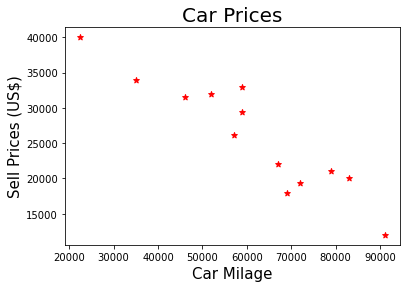

In [40]:
plt.title('Car Prices', fontsize=20)
plt.xlabel('Car Milage', fontsize=15)
plt.ylabel('Sell Prices (US$)', fontsize=15)
plt.scatter(d['Mileage'], d['Sell Price($)'], color='r', marker='*' )

In [41]:
#Create dummy variables
dummies = pd.get_dummies(d['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [42]:
#Concatenate dummies data with orginal dataframe
merged_df = pd.concat([d, dummies], axis='columns')
merged_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [43]:
#drop the first column and last (Sidenote: Benz over BMW on any day)
final_df = merged_df.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [44]:
#Create the X matrix of features
X = final_df.drop(['Sell Price($)'], axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [45]:
#create y target variable
y = final_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [46]:
X.shape

(13, 4)

In [47]:
y.shape

(13,)

In [48]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [49]:
reg.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [50]:
reg.intercept_

58976.625968537235

In [51]:
reg.score(X,y)

0.9417050937281083

In [52]:
#Price Of A Mercedez Benz that is 4 years old with 45 000 milage
reg.predict([[45000,4,0,0]])

array([36991.31721061])

In [53]:
#Price Of A BMW X5 that is 7 years old with 86 000 milage
reg.predict([[86000,7,0,1]])

array([11080.74313219])